<a href="https://colab.research.google.com/github/Rezeks/Python/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


{}

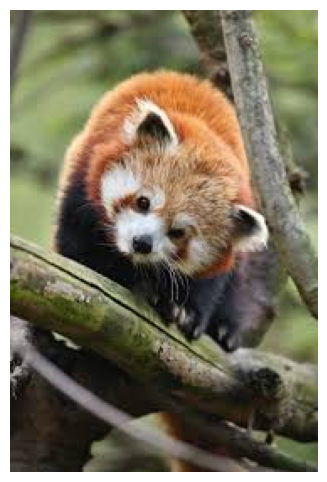

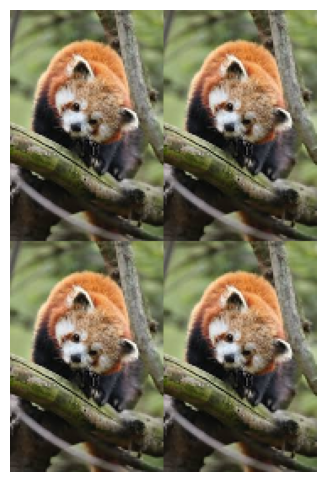

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

files = os.listdir()

images = [f for f in files if f.lower().endswith(('.jfif', '.jpeg', '.png'))]

if len(images) < 2:
    print("Upload two images using left panel")
    raise SystemExit

img1 = cv2.imread(images[0])
img2 = cv2.imread(images[1])

h, w = img1.shape[:2]
img2 = cv2.resize(img2, (w, h))

alphas = np.linspace(0, 1, 10)
results = []

for a in alphas:
    blended = cv2.addWeighted(img1, a, img2, 1 - a, 0)
    results.append(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(6, 6))
plt.imshow(results[-1])
plt.axis("off")
plt.show()

center = (w // 2, h // 2)
angle = 30

M = cv2.getRotationMatrix2D(center, angle, 1.0)
cos = abs(M[0, 0])
sin = abs(M[0, 1])

new_w = int(h * sin + w * cos)
new_h = int(h * cos + w * sin)

M[0, 2] += new_w / 2 - center[0]
M[1, 2] += new_h / 2 - center[1]

rotated = cv2.warpAffine(img1, M, (new_w, new_h))
cv2.imwrite("rotated.jpg", rotated)

small = cv2.resize(img1, (w // 2, h // 2))
row1 = np.hstack((small, small))
row2 = np.hstack((small, small))
collage = np.vstack((row1, row2))

cv2.imwrite("collage.jpg", collage)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
